# Lab 08: PCA and Clustering

<hr>

## Objectives

After this lab, You will be able to:

* use PCA and multiple clustering algorithms in sklearn
* use plotly express to plot simple graphs and 3D graphs
* use K-Means to do prediction


## Assignments

Finish every code cell marked with 'TO DO'.

## PCA

In [1]:
# import some necessary libraries
# set pandas to display all columns
# load the csv file
import pandas as pd

pd.set_option("display.max_columns", None)
df = pd.read_csv('clean_dataset.csv', index_col=0)

# show
df.head()

,Unnamed: 0,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Left,Right,nationality_encoded
0,0,L. Messi,Lionel Andrés Messi Cuccittini,ST,93,93,78000000.0,320000.0,34,1987-06-24,170,72,Argentina,Left,4,4,5,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,1,0,6.0
1,1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,Poland,Right,4,4,5,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0,1,123.0
2,2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,91,91,45000000.0,270000.0,36,1985-02-05,187,83,Portugal,Right,4,5,5,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0,1,124.0
3,3,Neymar Jr,Neymar da Silva Santos Júnior,ST,91,91,129000000.0,270000.0,29,1992-02-05,175,68,Brazil,Right,5,5,5,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0,1,20.0
4,4,K. De Bruyne,Kevin De Bruyne,CM,91,91,125500000.0,350000.0,30,1991-06-28,181,70,Belgium,Right,5,4,4,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0,1,13.0


In [2]:
# We will only use 'pace', 'shooting', 'passing', 'dribbling', 'defending', and 'physic' to cluster data
# So slice the data we need and save it in a separate dataframe
clusterdf = df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
clusterdf

,pace,shooting,passing,dribbling,defending,physic
0,85.0,92.0,91.0,95.0,34.0,65.0
1,78.0,92.0,79.0,86.0,44.0,82.0
2,87.0,94.0,80.0,88.0,34.0,75.0
3,91.0,83.0,86.0,94.0,37.0,63.0
4,76.0,86.0,93.0,88.0,64.0,78.0
...,...,...,...,...,...,...
19234,58.0,35.0,46.0,48.0,42.0,49.0
19235,59.0,39.0,50.0,46.0,41.0,51.0
19236,60.0,37.0,45.0,49.0,41.0,52.0
19237,68.0,46.0,36.0,48.0,15.0,42.0


In [3]:
# use PCA from sklearn to create 6 PCs and merge them into the original dataframe
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(clusterdf)
pca_df = pd.DataFrame(df_pca, columns=['PC1','PC2','PC3','PC4', 'PC5', 'PC6'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)
df.head()

,Unnamed: 0,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Left,Right,nationality_encoded,PC1,PC2,PC3,PC4,PC5,PC6
0,0,L. Messi,Lionel Andrés Messi Cuccittini,ST,93,93,78000000.0,320000.0,34,1987-06-24,170,72,Argentina,Left,4,4,5,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,1,0,6.0,-60.572787,-44.504916,14.855280,-9.513111,-6.533175,2.466311
1,1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,Poland,Right,4,4,5,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0,1,123.0,-59.308464,-27.452974,18.375147,8.006976,0.243541,0.149858
2,2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,91,91,45000000.0,270000.0,36,1985-02-05,187,83,Portugal,Right,4,5,5,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0,1,124.0,-58.966412,-40.681152,11.181248,4.788705,-0.073817,1.449148
3,3,Neymar Jr,Neymar da Silva Santos Júnior,ST,91,91,129000000.0,270000.0,29,1992-02-05,175,68,Brazil,Right,5,5,5,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0,1,20.0,-57.578239,-39.351166,4.248885,-11.499661,-6.704772,0.466285
4,4,K. De Bruyne,Kevin De Bruyne,CM,91,91,125500000.0,350000.0,30,1991-06-28,181,70,Belgium,Right,5,4,4,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0,1,13.0,-67.894894,-11.385838,22.447026,-8.766584,-1.604534,4.921906


In [4]:
# print the explained variance ratio for each PC
print('Explained Variance Ratio')
for i in range(6):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.8118720833449556
PC2: 0.12077655099308653
PC3: 0.036521952758185885
PC4: 0.022572484143102013
PC5: 0.005528288759718855
PC6: 0.0027286400009513575


(0.0, 1.1)

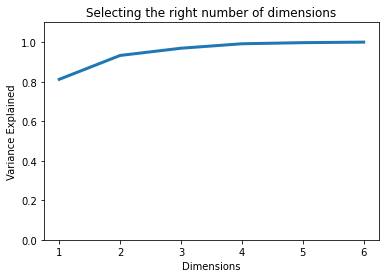

In [5]:
# plot the following figure
# Don't forget title, label and x ticks
import numpy as np
import matplotlib.pyplot as plt

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of dimensions')
plt.ylim([0,1.1])

In [18]:
# How many principal components are required to explain 95% of the variation in this data?
# Use code to show your answer
percent_of_variance_explained = .95

pca = PCA(n_components=percent_of_variance_explained)

pca_data = pca.fit_transform(clusterdf)

print("{} Principal Components are required to explain {} of the variation in this data.".format(pca.n_components_,percent_of_variance_explained))

3 Principal Components are required to explain 0.95 of the variation in this data.


## Plotly Express

The following example shows how to use 'plotly.express' to plot figures.
You should learn from the example. For other plotting methods, you can check [HERE](https://plotly.com/python/plotly-express/).

In [11]:
%pip install plotly

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 19.9 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near fu

In [6]:
import plotly.express as px

px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
              color='player_positions')


## K-Means

We will use the first three PCs to cluster our dataset and (pretend to) predict the position of Lion Messi, Lewandows
ki, Cristiano Ronaldo, and Neymar (the first 4 player of the dataset).

In [8]:
# Save the first 3 PCs of Messi, Lewandowski, Cristiano Ronaldo, and Neymar (the first 4 players) 
# in a separate testing dataframe
df2 = df[['PC1', 'PC2', 'PC3']][:4]
df2

,PC1,PC2,PC3
0,-60.572787,-44.504916,14.855280
1,-59.308464,-27.452974,18.375147
2,-58.966412,-40.681152,11.181248
3,-57.578239,-39.351166,4.248885


In [94]:
# Save the first 3 PCs of everyone else into our training data
training = df[['PC1', 'PC2', 'PC3']][4:]
training.head()

,PC1,PC2,PC3
4,-67.894894,-11.385838,22.447026
5,130.189680,-2.702486,3.460322
6,-64.469545,-38.743424,0.586326
7,130.189680,-2.702486,3.460322
8,130.189680,-2.702486,3.460322


In [12]:
# Use K-means model to fit the training data and predict the testing data
# You should see that all 4 players should be in the same cluster
# K = 8 (8 positions)
# Your prediction number may not be the same as mine (7). But all 4 numbers should be the same
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 8, random_state = 123)
kmeans_model.fit(training)

pred = kmeans_model.predict(df2)
print(pred)


[2 2 2 2]


## Agglomerative Clustering

In [14]:
# Use agglomerative clustering to cluster ALL players to 8 clusters
# You should still use the first 3 PCs to cluster the dataset
# This time, you should cluster ALL players
# Then, use plotly express to plot a 3-D scatter plot.
# In the figure, x, y, z are the first 3 PCs, and color is the prediction we get from agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=8, linkage='ward')
df3 = df[['PC1', 'PC2', 'PC3']]
ac.fit(df3)
pred=ac.labels_
px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
              color=pred)

In [16]:
# Compute and print the davies_bouldin score and silhouette score for agglomerative clustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

print("Davies-Bouldin Index:", davies_bouldin_score(df3, pred))
print("Silhouette Coefficient:", silhouette_score(df3, pred))

Davies-Bouldin Index: 1.0962879493496134
Silhouette Coefficient: 0.30111957399298056
